In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from collections import Counter
import GetOldTweets3 as got
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rak\AppData\Roaming\nltk_data...


True

In [63]:
def get_tweets_before():
    tweetselecton = got.manager.TweetCriteria().setQuerySearch('coronavirus').setSince('2019-10-01').setUntil('2019-10-30').setMaxTweets(500)
    tweets = got.manager.TweetManager.getTweets(tweetselecton)
    text_tweet = [[tweet.text] for tweet in tweets]
    return text_tweet

In [64]:
def get_tweets_after():
    tweetselecton = got.manager.TweetCriteria().setQuerySearch('coronavirus').setSince('2020-04-01').setUntil('2020-04-30').setMaxTweets(500)
    tweets = got.manager.TweetManager.getTweets(tweetselecton)
    text_tweet = [[tweet.text] for tweet in tweets]
    return text_tweet

In [65]:
text=""
text_tweets = get_tweets_before()
length=len(text_tweets)

for i in range(0, length):
    text=text_tweets[i][0]+" "+text

lower_case=text.lower()

#remove punctuation
cleaned_text = lower_case.translate(str.maketrans('','', string.punctuation))
tokenized_words = cleaned_text.split()
text_tweets

[[' mostly RVs, #flu in ~37%, not much adenovirus (AdV), plenty of human coronavirus (HCoV) H1N1 most associated with absenteeism, FluB, H3 and PIV -next 4 not associated with fever as much (so not "ILIs" #ARVM2019Bris'],
 ['Ou seja, não prescreve mas tbm não julga. Fica em aberto até a morte do réu, dos advogados e etc kkk'],
 ['Ou seja, tá cag@ndo para o meio ambiente. O que importa é ter algo pra atacar o governo. Gente sem escrúpulos é osso.'],
 ['Ou seja, tá cag@ndo pro meio ambiente, o que importa é atacar o governo. Não duvido nada que o petróleo Venezuelano foi despejado ao mar intencionalmente.'],
 ['A maioria dos comentários confirma que esquerdista tá se lixando para o meio ambiente, querem o caos para culpar o governo. Quanto mais destruição da natureza, melhor.'],
 ['Kkkkkkkkkkkkkkkkkkkkkkkkk Mudanças climaticas é a nova modinha cult, então vamos aproveitar'],
 ['PRO/AH/EDR> Equine coronavirus - Ireland: (CE,CK,KE) first report http://zpr.io/tqQ9P'],
 ['Middle East respira

In [66]:
final_words =[]
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)
len(final_words)

7879

In [67]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' happy': 5, ' attracted': 2, ' fearful': 2, ' angry': 2, ' average': 1, ' free': 1, ' entitled': 1, ' alone': 1, ' lost': 1, ' sad': 1, ' independent': 1, ' adequate': 1})


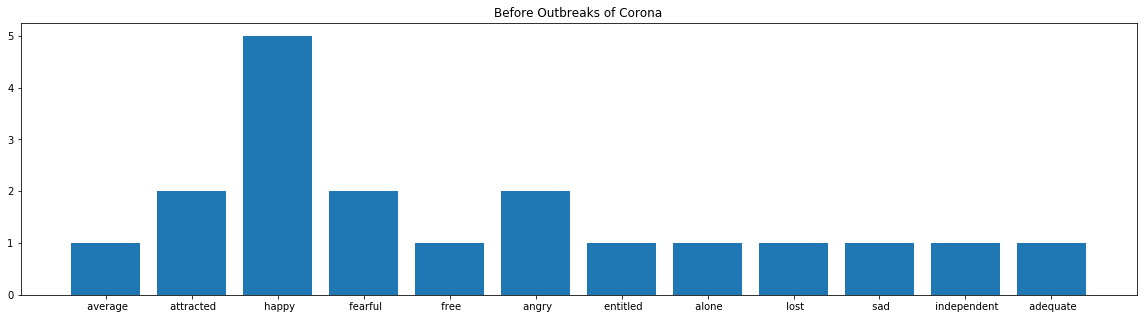

In [69]:
plt.figure(figsize=(20,5))
plt.bar(*zip(*w.items()))
plt.title("Before Outbreaks of Corona")
plt.show()

In [70]:
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores(cleaned_text))

{'neg': 0.038, 'neu': 0.917, 'pos': 0.044, 'compound': 0.9973}


In [71]:

def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     Negative Sentiment")
        
    elif score['neg'] < score['pos']:
        print("\n     Positive Sentiment")
    else:
        print("Neutral Sentiment")

In [72]:
sentiment_analyse(cleaned_text)


     Positive Sentiment


Before the corona outbreak most of the feeling are of positive sentiment

In [73]:
text=""
text_tweets = get_tweets_after()
length=len(text_tweets)

for i in range(0, length):
    text=text_tweets[i][0]+" "+text

lower_case=text.lower()

#remove punctuation
cleaned_text = lower_case.translate(str.maketrans('','', string.punctuation))
tokenized_words = cleaned_text.split()
text_tweets

[['Jugadores con Coronavirus https://youtu.be/MSFZbh06j-U vía @YouTube'],
 ['Según el ministerio de salud @DrJuanCZevallos solo el 1% de los INFECTADOS por CORONAVIRUS morirán,...eso quiere decir que en el Ecuador hay 2240.000 Infectados '],
 ["Inmates With #Coronavirus Are Being Thrown Into 'Extremely Difficult' Confinement: Prison Watchdog "],
 ['Ce n’est pas le temps de faire des tests à l’aveugle en temps de crise, c’est le temps de donner des antiviraux et plantes fébrifuge et astringente. Le virus quand il détruit les cellules il oxyde le corps et pour faire sortir les radicaux libre il faut donner des anti oxydants'],
 ["Quant vous parlez de l'Afrique vous ne parlez que de ses mauvais côtés ? Pourquoi le remède contre le Corona virus du Madagascar ne figure pas dans vos actualités ? C'est vraiment dingue"],
 ['By the time he’s done he’ll have the coronavirus have a know disclosure close against him'],
 ['How come the corona virus is only killing males and females, and not the ot

8846
Counter({' sad': 5, ' happy': 3, ' attracted': 2, ' free': 2, ' angry': 2, ' loved': 2, ' average': 1, ' powerless': 1, ' alone': 1, ' lost': 1, ' attached': 1, ' obsessed': 1, ' fearful': 1, ' entitled': 1})


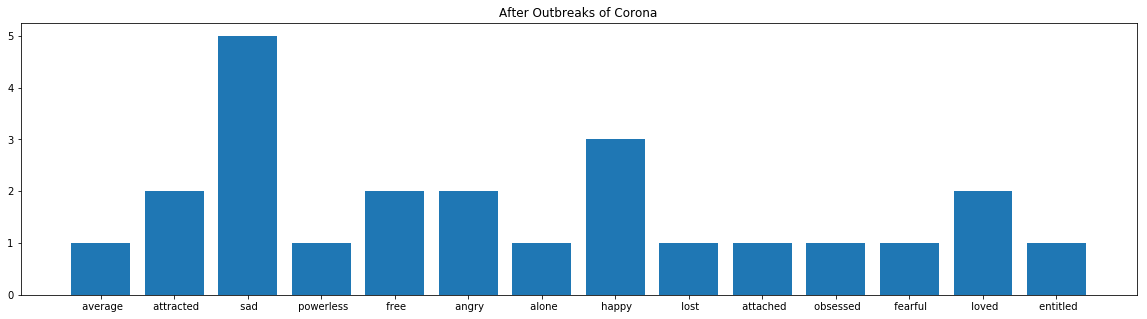

In [74]:
final_words =[]
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)
print(len(final_words))

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

plt.figure(figsize=(20,5))
plt.bar(*zip(*w.items()))
plt.title("After Outbreaks of Corona")
plt.show()

In [75]:
sentiment_analyse(cleaned_text)


     Negative Sentiment


After the corona outbreak most of the feeling are of negative sentiment

#### Checking the count of words from BOW

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
input_list = []
with open('A.txt','r',encoding='utf-8') as file:
    for line in file:
        input_line = line.replace('\n',' ').replace(',',' ').strip()
        input_list.append(input_line)

input_list

["Independence Day is celebrated annually on 15 August as a national holiday in India commemorating the nation's independence from the United Kingdom on 15 August 1947  the day when the provisions of the Indian Independence Act 1947  which transferred legislative sovereignty to the Indian Constituent Assembly  came into effect. India retained King George VI as head of state until its transition to a full republic  when the nation adopted the Constitution of India on 26 January 1950 (celebrated as Indian Republic Day) and replaced the dominion prefix  Dominion of India  with the enactment of the sovereign law Constitution of India. India attained independence following the Independence Movement noted for largely non-violent resistance and civil disobedience.",
 '',
 "Independence coincided with the partition of India  in which British India was divided along religious lines into the Dominions of India and Pakistan; the partition was accompanied by violent riots and mass casualties  and 

In [78]:
vect1 = CountVectorizer()
vect1.fit_transform(input_list)
data = vect1.get_feature_names()
print("featues list : ", data)

featues list :  ['15', '1947', '1950', '26', 'above', 'accompanied', 'act', 'address', 'adopted', 'along', 'an', 'and', 'annually', 'as', 'assembly', 'attained', 'august', 'begins', 'bismillah', 'british', 'broadcast', 'broadcaster', 'by', 'came', 'casualties', 'celebrated', 'ceremonies', 'civil', 'coincided', 'commemorating', 'constituent', 'constitution', 'cultural', 'customarily', 'day', 'delhi', 'disobedience', 'displacement', 'divided', 'dominion', 'dominions', 'doordarshan', 'due', 'each', 'effect', 'enactment', 'entire', 'event', 'events', 'first', 'flag', 'following', 'for', 'fort', 'from', 'full', 'gate', 'george', 'gives', 'head', 'hoisting', 'holiday', 'in', 'incumbent', 'independence', 'india', 'indian', 'into', 'is', 'it', 'its', 'january', 'jawaharlal', 'khan', 'king', 'kingdom', 'lahori', 'largely', 'law', 'legislative', 'lines', 'mass', 'million', 'minister', 'movement', 'music', 'nation', 'national', 'nearly', 'nehru', 'non', 'noted', 'observed', 'of', 'on', 'pakistan'

In [79]:
text = open('B.txt').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = word_tokenize(cleaned_text, "english")
tokenized_words

['during',
 'the',
 'american',
 'revolution',
 'the',
 'legal',
 'separation',
 'of',
 'the',
 'thirteen',
 'colonies',
 'from',
 'great',
 'britain',
 'in',
 '1776',
 'actually',
 'occurred',
 'on',
 'july',
 '2',
 'when',
 'the',
 'second',
 'continental',
 'congress',
 'voted',
 'to',
 'approve',
 'a',
 'resolution',
 'of',
 'independence',
 'that',
 'had',
 'been',
 'proposed',
 'in',
 'june',
 'by',
 'richard',
 'henry',
 'lee',
 'of',
 'virginia',
 'declaring',
 'the',
 'united',
 'states',
 'independent',
 'from',
 'great',
 'britains',
 'rule56',
 'after',
 'voting',
 'for',
 'independence',
 'congress',
 'turned',
 'its',
 'attention',
 'to',
 'the',
 'declaration',
 'of',
 'independence',
 'a',
 'statement',
 'explaining',
 'this',
 'decision',
 'which',
 'had',
 'been',
 'prepared',
 'by',
 'a',
 'committee',
 'of',
 'five',
 'with',
 'thomas',
 'jefferson',
 'as',
 'its',
 'principal',
 'author',
 'congress',
 'debated',
 'and',
 'revised',
 'the',
 'wording',
 'of',
 'the

In [82]:
count_data = []
for word in data:
    for words in tokenized_words:
        if word == words:
            count_data.append(words)
count = Counter(count_data)
count

Counter({'and': 6,
         'as': 6,
         'august': 1,
         'by': 6,
         'celebrated': 2,
         'day': 5,
         'for': 1,
         'from': 5,
         'in': 5,
         'independence': 10,
         'is': 2,
         'it': 5,
         'its': 3,
         'nearly': 1,
         'of': 24,
         'on': 14,
         'the': 33,
         'to': 10,
         'united': 2,
         'was': 7,
         'when': 1,
         'which': 2,
         'with': 3})